# Loan Default Case study

### Project Overview: Loan Default Study 🚀

In this project, we explore **why some borrowers fail to repay their loans** and what factors might predict such behavior. We analyze a dataset with information like the **type of loan**, **reason for borrowing**, and **borrowers' financial details**.

The goal is to identify patterns that lead to loan defaults. By looking at factors like **loan amount**, **interest rates**, and **borrowers' income**, we aim to uncover insights that can help lending institutions **make smarter decisions** and **reduce the risk of loan defaults**.

This project aims to analyze **loan default patterns** in the **banking and financial sector**. 
Using a dataset of 148,670 records, we investigate key variables such as 
<span style="color:blue">**loan type**</span>, 
<span style="color:green">**loan purpose**</span>, and 
<span style="color:red">**credit scores**</span>, and their impact on defaults.

Through statistical methods like hypothesis testing and correlation analysis, we examine the 
<span style="color:purple">**relationship between loan parameters**</span> such as 
<span style="color:orange">**interest rates, LTV ratios, and DTI ratios**</span>, with default likelihood.

The study aims to provide actionable insights to lending institutions, enabling them to 
<span style="color:teal">**enhance risk assessment strategies**</span> and 
<span style="color:brown">**proactively minimize loan defaults**</span> through better decision-making.

This study will ultimately assist in building safer and more reliable lending practices.

In [1]:
# Importing basic libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan (1).csv')
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [3]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

In [4]:
# finding the shape of the data
df.shape

(148670, 20)

- There are 148670 rows and 20 columns

In [5]:
for i in df.columns:
    a=df[i].nunique()
    print(f"Column '{i}' = {a}")

Column 'ID' = 148670
Column 'year' = 1
Column 'loan_limit' = 2
Column 'Gender' = 4
Column 'loan_type' = 3
Column 'loan_purpose' = 4
Column 'business_or_commercial' = 2
Column 'loan_amount' = 211
Column 'rate_of_interest' = 131
Column 'Upfront_charges' = 58271
Column 'property_value' = 385
Column 'occupancy_type' = 3
Column 'income' = 1001
Column 'credit_type' = 4
Column 'Credit_Score' = 401
Column 'co-applicant_credit_type' = 2
Column 'age' = 7
Column 'LTV' = 8484
Column 'Region' = 4
Column 'Status' = 2


#### finding the data type of the columns

In [6]:
df.dtypes

ID                            int64
year                          int64
loan_limit                   object
Gender                       object
loan_type                    object
loan_purpose                 object
business_or_commercial       object
loan_amount                   int64
rate_of_interest            float64
Upfront_charges             float64
property_value              float64
occupancy_type               object
income                      float64
credit_type                  object
Credit_Score                  int64
co-applicant_credit_type     object
age                          object
LTV                         float64
Region                       object
Status                        int64
dtype: object

In [7]:
# converting object dtype columns to categorial dtype columns

for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('category')

df.dtypes

ID                             int64
year                           int64
loan_limit                  category
Gender                      category
loan_type                   category
loan_purpose                category
business_or_commercial      category
loan_amount                    int64
rate_of_interest             float64
Upfront_charges              float64
property_value               float64
occupancy_type              category
income                       float64
credit_type                 category
Credit_Score                   int64
co-applicant_credit_type    category
age                         category
LTV                          float64
Region                      category
Status                         int64
dtype: object

### finding the null values

In [8]:
df.isnull().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
loan_type                       0
loan_purpose                  134
business_or_commercial          0
loan_amount                     0
rate_of_interest            36439
Upfront_charges             39642
property_value              15098
occupancy_type                  0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15098
Region                          0
Status                          0
dtype: int64

In [9]:
length=df.shape[0]

In [10]:
length

148670

In [11]:
for column in df.columns:
    a=round((df[column].isnull().sum()/length)*100,2)
    print(f"{column}: {a} %")

ID: 0.0 %
year: 0.0 %
loan_limit: 2.25 %
Gender: 0.0 %
loan_type: 0.0 %
loan_purpose: 0.09 %
business_or_commercial: 0.0 %
loan_amount: 0.0 %
rate_of_interest: 24.51 %
Upfront_charges: 26.66 %
property_value: 10.16 %
occupancy_type: 0.0 %
income: 6.15 %
credit_type: 0.0 %
Credit_Score: 0.0 %
co-applicant_credit_type: 0.0 %
age: 0.13 %
LTV: 10.16 %
Region: 0.0 %
Status: 0.0 %


In [12]:
# Find the mode of 'loan_limit' for each gender group
df['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [13]:
df['loan_limit'].mode()[0]

'cf'

In [14]:
df['loan_limit'].fillna(df['loan_limit'].mode()[0],inplace=True)

In [15]:
df['loan_limit'].isnull().sum()

0

In [16]:
df['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [17]:
148670*0.09/100

133.803

- 133.803 is neglegible compared to 148670

In [18]:
df['loan_purpose'].fillna(df['loan_purpose'].mode()[0],inplace=True)

In [19]:
df['loan_limit'].isnull().sum()

0

In [20]:
df['rate_of_interest'] = df.groupby('loan_type')['rate_of_interest'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [21]:
df['rate_of_interest'].isnull().sum()

0

In [22]:
df['Upfront_charges'] = df.groupby('loan_type')['Upfront_charges'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [23]:
df['Upfront_charges'].isnull().sum()

0

In [24]:
df['property_value'] = df.groupby('loan_type')['property_value'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [25]:
df['property_value'].isnull().sum()

0

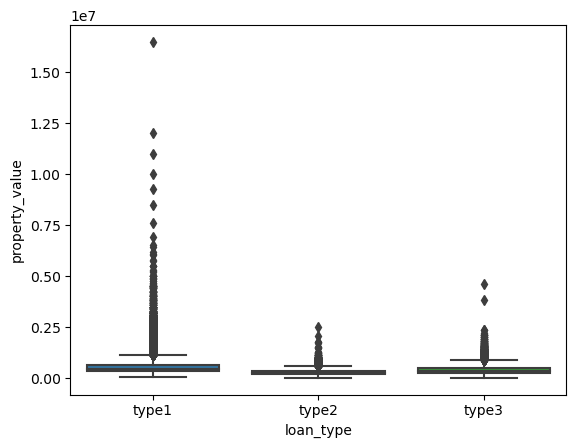

In [26]:
sns.boxplot(data=df,x='loan_type',y='property_value')
plt.show()

In [27]:
df['Upfront_charges'] = df.groupby('loan_type')['Upfront_charges'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [28]:
df['Upfront_charges'].isnull().sum()

0

In [29]:
df['income'] = df.groupby('loan_type')['income'].apply(lambda x: x.fillna(x.mean()))

In [30]:
df['income'].isnull().sum()

0

In [31]:
df['age'] = df.groupby('loan_type')['age'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

In [32]:
df['age'].isnull().sum()

0

In [33]:
df['LTV'] = df.groupby('loan_type')['LTV'].apply(lambda x: x.fillna(x.mean()))

In [34]:
df['LTV'].isnull().sum()

0

#### checking for null values

In [35]:
for column in df.columns:
    a=round((df[column].isnull().sum()/length)*100,2)
    print(f"{column}: {a} %")

ID: 0.0 %
year: 0.0 %
loan_limit: 0.0 %
Gender: 0.0 %
loan_type: 0.0 %
loan_purpose: 0.0 %
business_or_commercial: 0.0 %
loan_amount: 0.0 %
rate_of_interest: 0.0 %
Upfront_charges: 0.0 %
property_value: 0.0 %
occupancy_type: 0.0 %
income: 0.0 %
credit_type: 0.0 %
Credit_Score: 0.0 %
co-applicant_credit_type: 0.0 %
age: 0.0 %
LTV: 0.0 %
Region: 0.0 %
Status: 0.0 %


- SO, we have 0 null values in the data

# Feature engineering

### Debt-to-Income (DTI)

- df['DTI'] = df['loan_amount'] / df['income']

In [36]:
df['income'].describe()

count    148670.000000
mean       6833.881557
std        6312.954467
min           0.000000
25%        3840.000000
50%        5460.000000
75%        8280.000000
max      578580.000000
Name: income, dtype: float64

- We are replacing 0 income with 1

In [37]:
df['income'] = df['income'].replace(0, 1)
df['income'].describe()

count    148670.000000
mean       6833.890033
std        6312.945293
min           1.000000
25%        3840.000000
50%        5460.000000
75%        8280.000000
max      578580.000000
Name: income, dtype: float64

In [38]:
# Debt-to-Income (DTI)

df['dti'] = df['loan_amount'] / df['income']

In [39]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,...,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status,dti
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,3.99,0.0,...,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1,66.954023
1,24891,2019,cf,Male,type2,p1,b/c,206500,3.99,0.0,...,pr,4980.0,EQUI,552,EXP,55-64,86.512606,North,1,41.465863
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,...,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0,42.879747
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,0.0,...,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0,38.425926
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,...,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0,66.714559


In [40]:
df['dti'].describe()

count    1.486700e+05
mean     3.035589e+03
std      3.658988e+04
min      5.992573e-01
25%      3.789338e+01
50%      5.330460e+01
75%      7.164694e+01
max      1.836500e+06
Name: dti, dtype: float64

In [41]:
df[df['dti']<=1]

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,...,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status,dti
22369,47259,2019,cf,Joint,type1,p1,nob/c,106500,3.990,0.00,...,ir,177720.0,CRIF,531,EXP,45-54,77.173913,North,1,0.599257
72991,97881,2019,cf,Male,type1,p2,nob/c,76500,4.375,2917.19,...,sr,123540.0,CRIF,767,CIB,55-64,70.833333,south,0,0.619233


### Loan-to-Value (LTV)

- LTV=loan_amount/property_value

In [42]:
# we already have the ltv columns

In [43]:
df[df['LTV'] <= 80]

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,...,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status,dti
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.250,0.00,...,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0,38.425926
5,24895,2019,cf,Joint,type1,p1,nob/c,706500,3.990,370.00,...,pr,10080.0,EXP,864,EXP,35-44,70.089286,North,0,70.089286
6,24896,2019,cf,Joint,type1,p3,nob/c,346500,4.500,5120.00,...,pr,5040.0,EXP,860,EXP,55-64,79.109589,North,0,68.750000
8,24898,2019,cf,Joint,type1,p3,nob/c,376500,4.875,1150.00,...,pr,5580.0,CIB,580,EXP,55-64,78.765690,central,0,67.473118
9,24899,2019,cf,Sex Not Available,type3,p3,nob/c,436500,3.490,2316.50,...,pr,6720.0,CIB,788,EXP,55-64,63.444767,south,0,64.955357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,type1,p3,nob/c,436500,3.125,9960.00,...,pr,7860.0,CIB,659,EXP,55-64,71.792763,south,0,55.534351
148666,173556,2019,cf,Male,type1,p1,nob/c,586500,5.190,0.00,...,ir,7140.0,CIB,569,CIB,25-34,74.428934,south,0,82.142857
148667,173557,2019,cf,Male,type1,p4,nob/c,446500,3.125,1226.64,...,pr,6900.0,CIB,702,EXP,45-54,61.332418,North,0,64.710145
148668,173558,2019,cf,Female,type1,p4,nob/c,196500,3.500,4323.33,...,pr,7140.0,EXP,737,EXP,55-64,70.683453,North,0,27.521008


With 88,802 rows featuring an **LTV Eligible Ratio**, I would focus on these insights:

1. **Risk Level Assessment**: Higher LTV ratios in a substantial portion of the data indicate higher lending risks, suggesting that borrowers with low equity in property are more prone to default.

2. **Default Probability Correlation**: Borrowers with elevated LTV ratios may correlate with higher default rates, emphasizing the need for stricter lending criteria or enhanced monitoring.

3. **Regional Risk Variation**: Regional LTV trends might reveal areas with higher property values, where borrowers may have lower LTV ratios and thus reduced default risks.

4. **Potential Credit Policy Adjustments**: This insight supports the need to revise eligibility criteria, possibly setting LTV caps to manage exposure to high-risk loans effectively.

# Important metrics

### Understanding loan limit column

In [44]:
df['loan_limit'].value_counts()

cf     138692
ncf      9978
Name: loan_limit, dtype: int64

In [45]:
loan_status_counts = df.groupby(['loan_limit', 'Status']).size().reset_index(name='counts')

# Calculate total counts for each loan limit
total_counts = loan_status_counts.groupby('loan_limit')['counts'].sum()

# Calculate the percentage for each row
loan_status_counts['percentage'] = loan_status_counts.apply(
    lambda row: (row['counts'] / total_counts[row['loan_limit']]) * 100, axis=1)

# Display the results
print(loan_status_counts[['loan_limit', 'Status', 'percentage']])

  loan_limit  Status  percentage
0         cf       0   75.971938
1         cf       1   24.028062
2        ncf       0   66.786931
3        ncf       1   33.213069


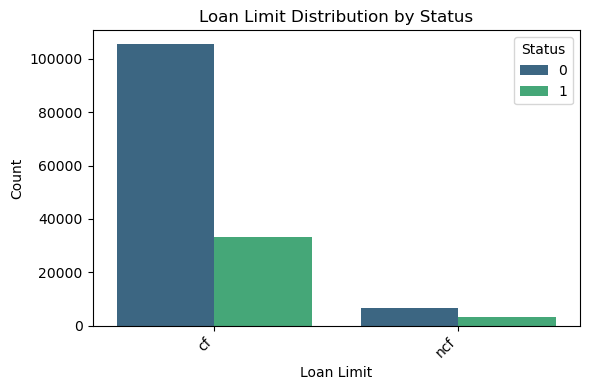

In [46]:
# Group by 'loan_limit' and 'Status', then count the occurrences
loan_status_counts = df.groupby(['loan_limit', 'Status']).size().reset_index(name='counts')

# Create a barplot with loan limits on the x-axis, counts on the y-axis, and 'Status' as hue
plt.figure(figsize=(6,4))
sns.barplot(data=loan_status_counts, x='loan_limit', y='counts', hue='Status', palette='viridis')

# Customize the plot
plt.xlabel('Loan Limit')
plt.ylabel('Count')
plt.title('Loan Limit Distribution by Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


**Loan Limit and Default Rate Correlation:**
Borrowers with a "cf" (conforming) loan limit have a lower default rate (24.03%) compared to borrowers with a "ncf" (non-conforming) loan limit, who show a higher default rate of 33.21%.

**Loan Limit Distribution:**
The majority of the loans fall under the "cf" category, with a much smaller portion classified as "ncf." This indicates a preference or higher availability of conforming loans in the dataset.

**Non-Conforming Loans and Risk:**
Borrowers with "ncf" loans have a relatively higher proportion of defaulters, suggesting that non-conforming loans might be associated with greater lending risks.

#### Understanding Gender Column

In [47]:
# Group by 'Gender' and 'Status', then count the occurrences
gender_status_counts = df.groupby(['Gender', 'Status']).size().reset_index(name='counts')

# Calculate total counts for each gender
total_gender_counts = gender_status_counts.groupby('Gender')['counts'].sum()

# Calculate the percentage for each row
gender_status_counts['percentage'] = gender_status_counts.apply(
    lambda row: (row['counts'] / total_gender_counts[row['Gender']]) * 100, axis=1)

# Display the results
print(gender_status_counts[['Gender', 'Status', 'counts', 'percentage']])

              Gender  Status  counts  percentage
0             Female       0   20418   74.884472
1             Female       1    6848   25.115528
2              Joint       0   33466   80.837701
3              Joint       1    7933   19.162299
4               Male       0   31255   73.808624
5               Male       1   11091   26.191376
6  Sex Not Available       0   26892   71.409225
7  Sex Not Available       1   10767   28.590775


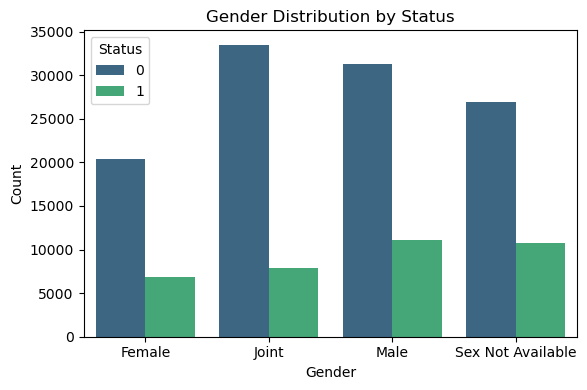

In [48]:
# Group by 'Gender' and 'Status', then count the occurrences
gender_status_counts = df.groupby(['Gender', 'Status']).size().reset_index(name='counts')

# Create a barplot with Gender on the x-axis, counts on the y-axis, and 'Status' as hue
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_status_counts, x='Gender', y='counts', hue='Status', palette='viridis')

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Status')
plt.xticks(rotation=0)  # No rotation needed for Gender
plt.tight_layout()

# Show the plot
plt.show()


**Lowest Default Rate:** Joint accounts have the lowest default rate at 19.16%, indicating better repayment reliability.

**Highest Default Rate:** "Sex Not Available" borrowers have the highest default rate at 28.59%, followed by males at 26.19%.

**General Pattern:** Females have a slightly lower default rate (25.12%) compared to males, suggesting gender differences in repayment behavior.

In [49]:
# Group by 'occupancy_type' and 'Status', then count the occurrences
occupancy_status_counts = df.groupby(['occupancy_type', 'Status']).size().reset_index(name='counts')

# Calculate total counts for each occupancy type
total_occupancy_counts = occupancy_status_counts.groupby('occupancy_type')['counts'].sum()

# Calculate the percentage for each row
occupancy_status_counts['percentage'] = occupancy_status_counts.apply(
    lambda row: (row['counts'] / total_occupancy_counts[row['occupancy_type']]) * 100, axis=1)

# Display the results
print(occupancy_status_counts[['occupancy_type', 'Status', 'counts', 'percentage']])


  occupancy_type  Status  counts  percentage
0             ir       0    5139   70.013624
1             ir       1    2201   29.986376
2             pr       0  104612   75.695545
3             pr       1   33589   24.304455
4             sr       0    2280   72.866731
5             sr       1     849   27.133269


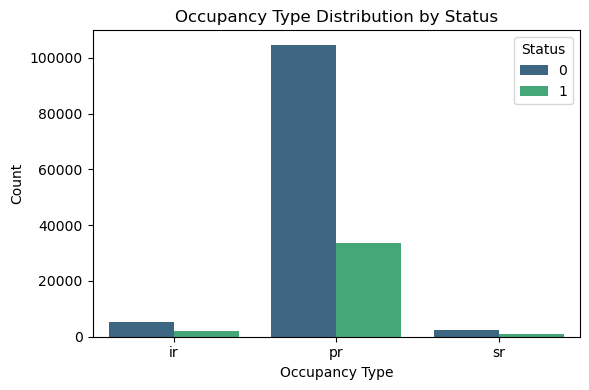

In [50]:
# Group by 'occupancy_type' and 'Status', then count the occurrences
occupancy_status_counts = df.groupby(['occupancy_type', 'Status']).size().reset_index(name='counts')

# Create a barplot with occupancy_type on the x-axis, counts on the y-axis, and 'Status' as hue
plt.figure(figsize=(6, 4))
sns.barplot(data=occupancy_status_counts, x='occupancy_type', y='counts', hue='Status', palette='viridis')

# Customize the plot
plt.xlabel('Occupancy Type')
plt.ylabel('Count')
plt.title('Occupancy Type Distribution by Status')
plt.xticks(rotation=0)  # No rotation needed for occupancy_type
plt.tight_layout()

# Show the plot
plt.show()


1. **Higher Defaults for "ir" Occupancy**: 29.99% of loans in individual residences (ir) default, indicating higher risk.
2. **Majority in "pr" Occupancy**: Primary residences (pr) account for 75.7% non-defaults, suggesting lower default risk.
3. **Lower Defaults for "sr" Occupancy**: Secondary residences (sr) show a 27.13% default rate, with fewer loans, indicating moderate risk.

#### Understanding status with respect to credict score column

Average Credit Score by Default Status:


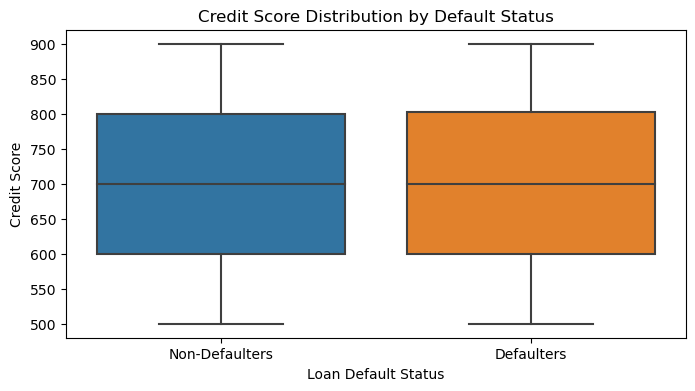

In [51]:
# Group by default status to get average credit scores
credit_score_impact = df.groupby('Status')['Credit_Score'].mean().reset_index()

# Display average credit score for defaulters and non-defaulters
print("Average Credit Score by Default Status:")
credit_score_impact

# Visualize the impact of Credit Score on Default likelihood using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Status', y='Credit_Score')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.title('Credit Score Distribution by Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Credit Score')
plt.show()

In [52]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [53]:
36639/112031

0.32704340762824574

In [54]:
df['Credit_Score'].describe()

count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64

- Here, the minimum credit score is 500 and maximum credit score is 900, and `loan default is independent of credit score`

#### Understanding credict type column

In [98]:
# Group by 'credit_type' and 'Status', then count the occurrences
credit_status_counts = df.groupby(['credit_type', 'Status']).size().reset_index(name='counts')

# Calculate total counts for each credit type
total_credit_counts = credit_status_counts.groupby('credit_type')['counts'].sum()

# Calculate the percentage for each row
credit_status_counts['percentage'] = credit_status_counts.apply(
    lambda row: (row['counts'] / total_credit_counts[row['credit_type']]) * 100, axis=1)

# Display the results
print(credit_status_counts[['credit_type', 'Status', 'counts', 'percentage']])


  credit_type  Status  counts  percentage
0         CIB       0   40542   84.195880
1         CIB       1    7610   15.804120
2        CRIF       0   36774   83.765746
3        CRIF       1    7127   16.234254
4        EQUI       0       1    0.006537
5        EQUI       1   15297   99.993463
6         EXP       0   34714   84.014618
7         EXP       1    6605   15.985382


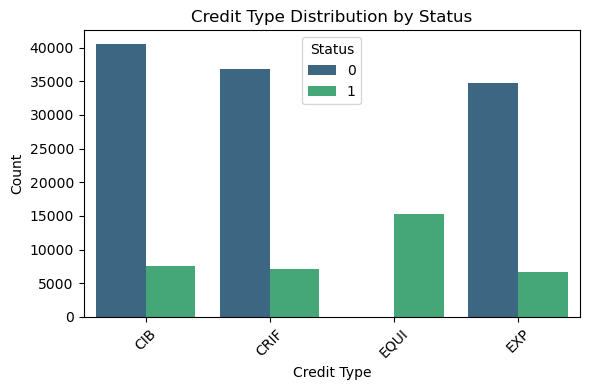

In [99]:
# Group by 'credit_type' and 'Status', then count the occurrences
credit_status_counts = df.groupby(['credit_type', 'Status']).size().reset_index(name='counts')

# Create a barplot with credit_type on the x-axis, counts on the y-axis, and 'Status' as hue
plt.figure(figsize=(6, 4))
sns.barplot(data=credit_status_counts, x='credit_type', y='counts', hue='Status', palette='viridis')

# Customize the plot
plt.xlabel('Credit Type')
plt.ylabel('Count')
plt.title('Credit Type Distribution by Status')
plt.xticks(rotation=45)  # Rotate for better readability if needed
plt.tight_layout()

# Show the plot
plt.show()

1. **CIB** and **CRIF** have high non-default rates (84.2% and 83.8%, respectively) and low default rates (~15.8% and ~16.2%).  
2. **EQUI** exhibits an extremely high default rate (99.99%), indicating it might be a significant risk factor.  
3. **EXP** also shows a strong non-default rate (84%) but slightly higher defaults (16%) compared to CIB and CRIF.

#### Understanding co-applicant credict type

In [101]:
# Group by 'applicant_credit_type' and 'Status', then count the occurrences
credit_status_counts = df.groupby(['co-applicant_credit_type', 'Status']).size().reset_index(name='counts')

# Calculate total counts for each co-applicant_credit_type
total_credit_counts = credit_status_counts.groupby('co-applicant_credit_type')['counts'].sum()

# Calculate the percentage for each row
credit_status_counts['percentage'] = credit_status_counts.apply(
    lambda row: (row['counts'] / total_credit_counts[row['co-applicant_credit_type']]) * 100, axis=1)

# Display the results
print(credit_status_counts[['co-applicant_credit_type', 'Status', 'counts', 'percentage']])


  co-applicant_credit_type  Status  counts  percentage
0                      CIB       0   60679   81.566566
1                      CIB       1   13713   18.433434
2                      EXP       0   51352   69.134872
3                      EXP       1   22926   30.865128


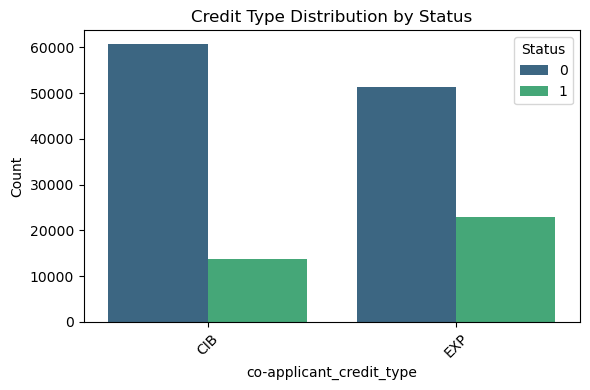

In [102]:
# Group by 'co-applicant_credit_type' and 'Status', then count the occurrences
credit_status_counts = df.groupby(['co-applicant_credit_type', 'Status']).size().reset_index(name='counts')

# Create a barplot with co-applicant_credit_type on the x-axis, counts on the y-axis, and 'Status' as hue
plt.figure(figsize=(6, 4))
sns.barplot(data=credit_status_counts, x='co-applicant_credit_type', y='counts', hue='Status', palette='viridis')

# Customize the plot
plt.xlabel('co-applicant_credit_type')
plt.ylabel('Count')
plt.title('Credit Type Distribution by Status')
plt.xticks(rotation=45)  # Rotate for better readability if needed
plt.tight_layout()

# Show the plot
plt.show()

1. **CIB** co-applicant credit type has a higher non-default rate (81.57%) compared to its default rate (18.43%), indicating relatively lower risk.  
2. **EXP** co-applicant credit type shows a significantly higher default rate (30.87%) compared to CIB, posing a moderate to high risk.  
3. Loans with **CIB** co-applicant credit types are safer compared to those with **EXP** credit types, which demand closer scrutiny.  

### Calculate the correlation between Credit Score and Default Status

Correlation between Credit Score and Default Status: 0.00


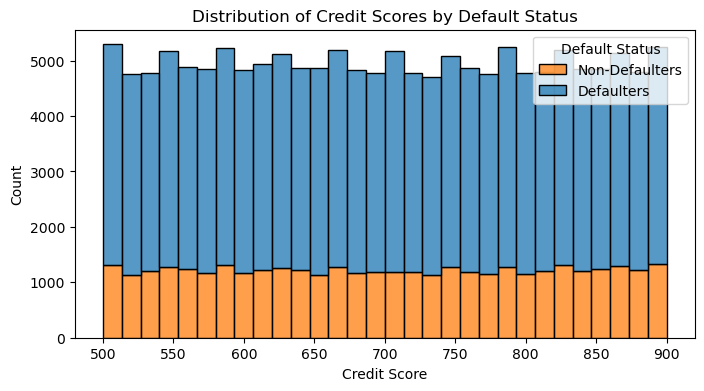

In [55]:
# Calculate the correlation between Credit Score and Default Status
correlation = df[['Credit_Score', 'Status']].corr().iloc[0, 1]
print(f"Correlation between Credit Score and Default Status: {correlation:.2f}")

# Plotting Credit Score vs. Default Status
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Credit_Score', hue='Status', multiple="stack", bins=30)
plt.title('Distribution of Credit Scores by Default Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

- **Consistent Proportion:** Across the credit score range (500 to 900), the proportions of defaulters and non-defaulters appear relatively constant. This suggests that credit score does not strongly differentiate between defaulters and non-defaulters in this dataset.

- **Majority of Defaulters:** In each credit score bin, defaulters represent a larger portion than non-defaulters, indicating a higher overall count of defaulters relative to non-defaulters in this dataset.

- **Credit Score Range:** The distribution is relatively uniform across different credit scores, with no significant peaks or dips at particular score ranges.

([<matplotlib.axis.YTick at 0x183b07d10d0>,
 [Text(0, 0, 'Non-Defaulter'), Text(0, 1, 'Defaulter')])

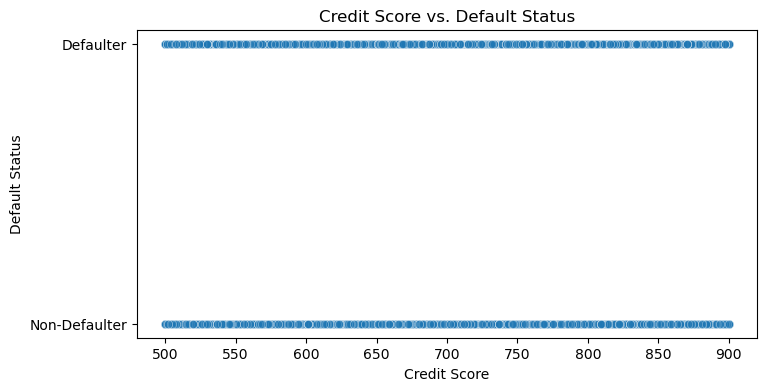

In [56]:
# Optional: Scatter plot for better visual correlation insight
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Credit_Score', y='Status', alpha=0.5)
plt.title('Credit Score vs. Default Status')
plt.xlabel('Credit Score')
plt.ylabel('Default Status')
plt.yticks([0, 1], ['Non-Defaulter', 'Defaulter'])

- **Uniform Distribution Across Credit Scores:** Within each category (Defaulter and Non-Defaulter), credit scores are spread almost uniformly across the range from 500 to 900. This suggests that there’s no clear trend or distinction in credit score ranges between defaulters and non-defaulters.

- **No Overlap:** Since the data points for Defaulters and Non-Defaulters are completely separated by category, it may imply that credit score alone is not a differentiating factor in predicting default status within this dataset.

### Calculate correlation between DTI and Default Status

Correlation between DTI and Default Status: 0.14


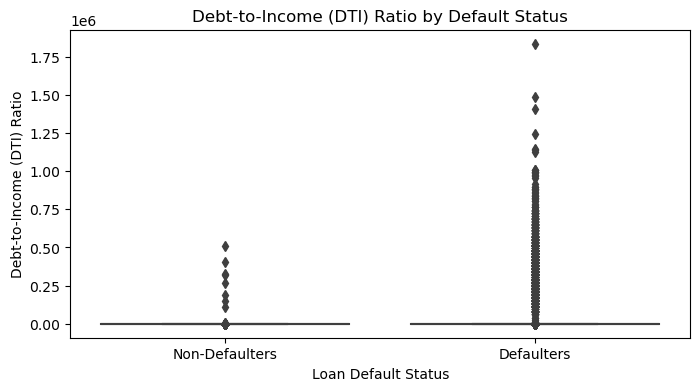

In [57]:
# Calculate correlation between DTI and Default Status
dti_correlation = df[['dti', 'Status']].corr().iloc[0, 1]
print(f"Correlation between DTI and Default Status: {dti_correlation:.2f}")

# Visualize the distribution of DTI by Default Status using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Status', y='dti')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.title('Debt-to-Income (DTI) Ratio by Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Debt-to-Income (DTI) Ratio')
plt.show()

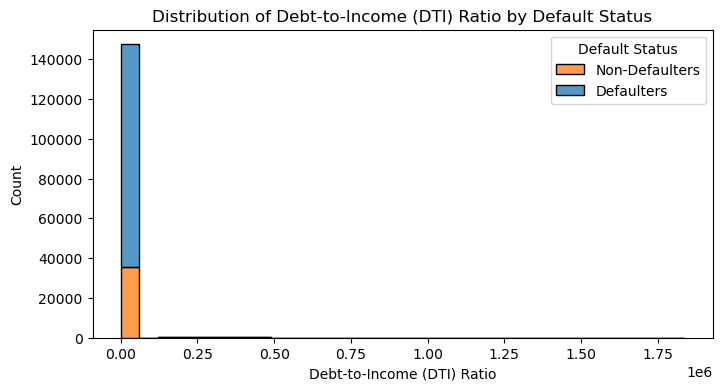

In [58]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='dti', hue='Status', multiple="stack", bins=30)
plt.title('Distribution of Debt-to-Income (DTI) Ratio by Default Status')
plt.xlabel('Debt-to-Income (DTI) Ratio')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

- **Higher DTI Ratios Among Defaulters:** The DTI ratio for Defaulters shows a much wider range, with several extreme values (outliers) reaching up to 1.75 million, suggesting that some defaulters have extraordinarily high DTI ratios. This pattern indicates that high DTI ratios are more common among defaulters.

- **Lower DTI Ratios Among Non-Defaulters:** The DTI ratios for Non-Defaulters are much lower overall, with only a few minor outliers. This suggests that lower DTI ratios are generally associated with non-defaulters, possibly indicating a lower financial burden relative to income.

- **Outliers:** The large spread of outliers in the Defaulters group, especially at high DTI ratios, highlights a potential risk factor for defaulting. Individuals with higher DTI ratios might be struggling more with debt relative to their income, making them more prone to default.

### Interest rate Vs default likelihood

In [59]:
interest_rate_correlation = df[['rate_of_interest', 'Status']].corr().iloc[0, 1]
print(f"Correlation between Interest Rate and Default Status: {interest_rate_correlation:.2f}")

Correlation between Interest Rate and Default Status: -0.11


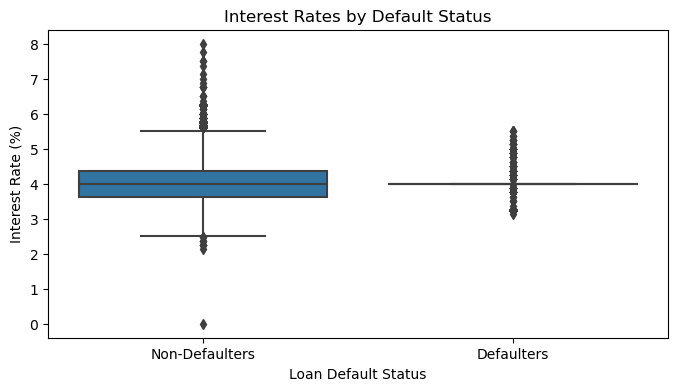

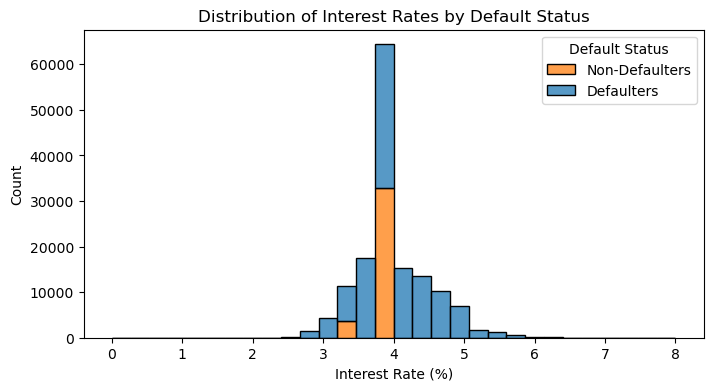

In [60]:
# Visualize the distribution of Interest Rates by Default Status using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Status', y='rate_of_interest')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.title('Interest Rates by Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Interest Rate (%)')
plt.show()

# Optional: Histogram for additional insights
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='rate_of_interest', hue='Status', multiple="stack", bins=30)
plt.title('Distribution of Interest Rates by Default Status')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

- **Concentration Around 4%:** Both defaulters and non-defaulters have a strong concentration of interest rates around 4%, suggesting this rate is the most common among borrowers.

- **Higher Default Proportion at Higher Rates:** As interest rates increase above 4%, there appears to be a larger proportion of defaulters than non-defaulters, indicating a potential increase in default risk with higher interest rates.

- **Non-Defaulters at Common Rates:** Non-defaulters are more prominent at the peak around 4%, suggesting that lower interest rates may be associated with a reduced likelihood of default.

### Loan Amount and Default Rates

Correlation between Loan Amount and Default Status: -0.04


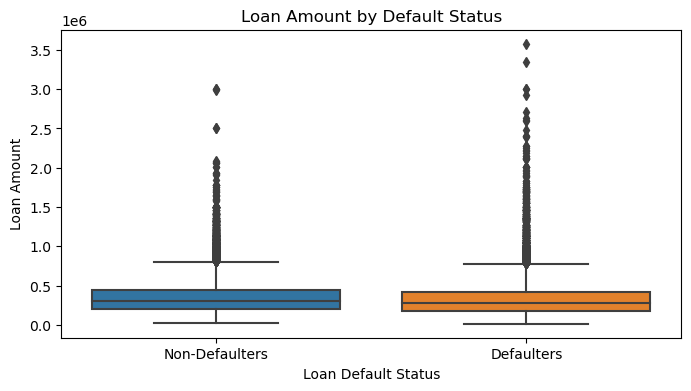

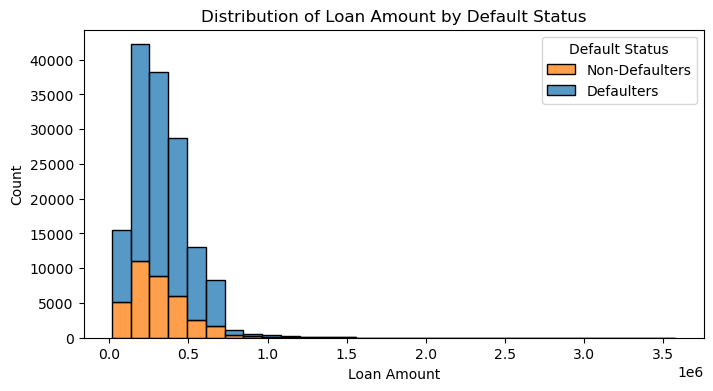

In [61]:
# Calculate the correlation between Loan Amount and Default Status
loan_amount_correlation = df[['loan_amount', 'Status']].corr().iloc[0, 1]
print(f"Correlation between Loan Amount and Default Status: {loan_amount_correlation:.2f}")

# Visualize the distribution of Loan Amount by Default Status using a box plot
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Status', y='loan_amount')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.title('Loan Amount by Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Loan Amount')
plt.show()

# Optional: Histogram to compare loan amounts for defaulters and non-defaulters
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='loan_amount', hue='Status', multiple="stack", bins=30)
plt.title('Distribution of Loan Amount by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

- **Higher Default Rates at Lower Loan Amounts:** The majority of loan defaults appear to occur at lower loan amounts, suggesting that borrowers with smaller loans are more likely to default.

- **Low Default for High Loan Amounts:** As loan amounts increase, the count of defaulters decreases significantly. This might indicate that individuals with larger loans have better financial stability or stricter eligibility requirements.

- **Dominance of Defaulters Across Loan Amounts:** For each loan amount range in the chart, defaulters generally outnumber non-defaulters, especially in the lower loan amount ranges, implying that default risk may be more common across various loan amounts but especially prevalent in smaller loans.

### Loan Type and Default Patterns

Default Rate by Loan Type (%):
loan_type
type1    22.774867
type2    34.543878
type3    25.055989
Name: Status, dtype: float64


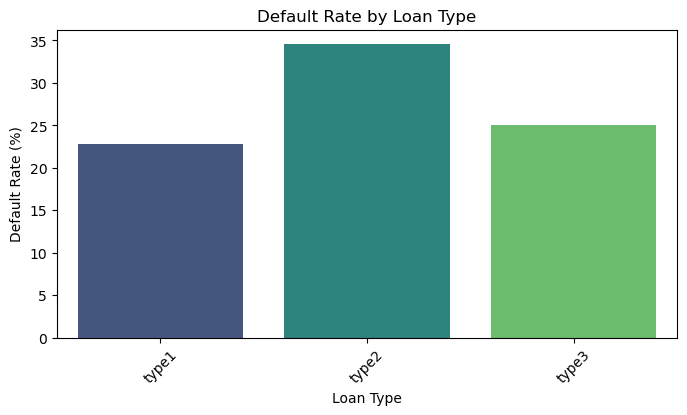

In [62]:
# Calculate default rate for each loan type
default_rate_by_loan_type = df.groupby('loan_type')['Status'].mean() * 100
print("Default Rate by Loan Type (%):")
print(default_rate_by_loan_type)

# Reset the index for plotting
default_rate_by_loan_type = default_rate_by_loan_type.reset_index()

# Plot the default rates by loan type
plt.figure(figsize=(8, 4))
sns.barplot(data=default_rate_by_loan_type, x='loan_type', y='Status', palette="viridis")
plt.title('Default Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.show()

- **Highest Default Rate for Type 2 Loans:** Type 2 loans have the highest default rate at 34.54%, indicating they may carry higher risk or attract riskier borrowers.

- **Moderate Default Rate for Type 3 Loans:** Type 3 loans show a default rate of 25.06%, which is lower than Type 2 but still significant.

- **Lowest Default Rate for Type 1 Loans:** Type 1 loans have the lowest default rate at 22.77%, suggesting they might be safer or better suited to lower-risk borrowers.

### Collateral Influence

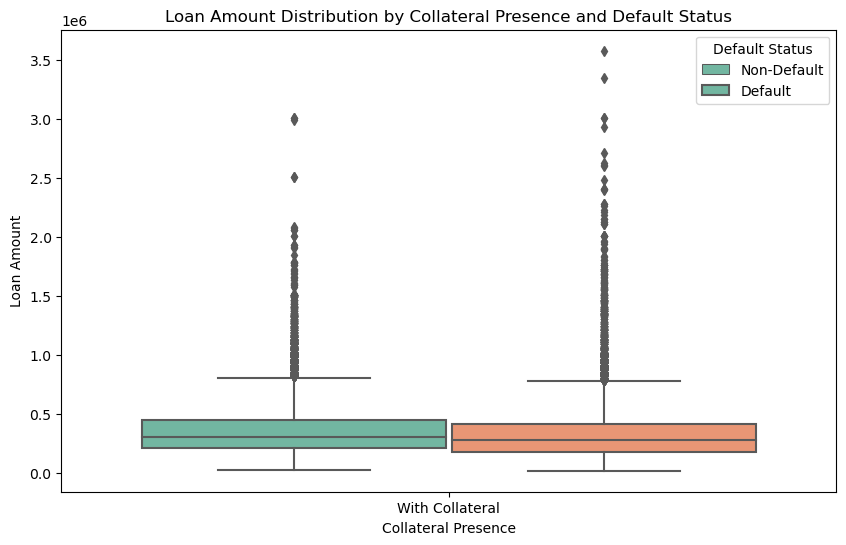

In [63]:
# Create the 'collateral_present' column based on property_value
df['collateral_present'] = df['property_value'].apply(lambda x: 'With Collateral' if x > 0 else 'No Collateral')

# Box plot for loan amount distribution by collateral presence and default status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='collateral_present', y='loan_amount', hue='Status', palette="Set2")
plt.title('Loan Amount Distribution by Collateral Presence and Default Status')
plt.xlabel('Collateral Presence')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.show()

- **Loan Amount Similarity by Default Status**: The distribution of loan amounts is fairly similar across default and non-default statuses for loans with collateral, as seen in the overlapping box plots.

- **Presence of Outliers**: Both default and non-default categories have outliers, indicating some very high loan amounts. However, these outliers are more concentrated for non-default loans.

- **Central Tendency and Spread**: The median loan amount appears slightly higher for non-defaults compared to defaults, suggesting a marginal tendency for larger loan amounts to be non-defaulted, even though the overall distributions largely overlap.

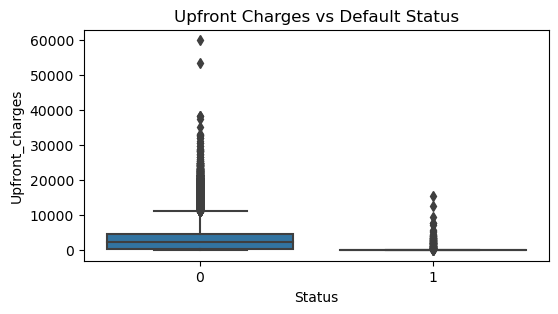

In [64]:
# Visualizing the relationship between Upfront Charges and Default Status
plt.figure(figsize=(6,3))
sns.boxplot(x='Status', y='Upfront_charges', data=df)
plt.title('Upfront Charges vs Default Status')
plt.show()

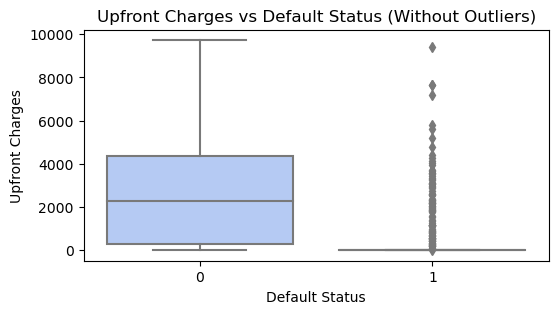

In [65]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'Upfront_charges' column
df_cleaned = remove_outliers(df, 'Upfront_charges')

# Visualizing the relationship after removing outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='Status', y='Upfront_charges', data=df_cleaned, palette='coolwarm')
plt.title('Upfront Charges vs Default Status (Without Outliers)')
plt.xlabel('Default Status')
plt.ylabel('Upfront Charges')
plt.show()


1. **Higher Upfront Charges for Non-Defaulters**: The non-defaulters (Status 0) have a wider distribution of upfront charges, with many values peaking around higher amounts, suggesting that they tend to have higher charges.
  
2. **Lower Upfront Charges for Defaulters**: Defaulters (Status 1) show a much narrower distribution of upfront charges, with most values clustered around lower amounts.

3. **Outliers in Non-Defaulters**: Non-defaulters have several extreme outliers for upfront charges, indicating that some individuals are paying exceptionally high upfront amounts.

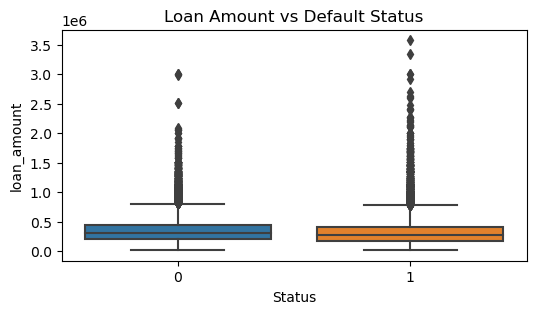

In [66]:
# Visualizing the relationship between Loan Amount and Default Status
plt.figure(figsize=(6,3))
sns.boxplot(x='Status', y='loan_amount', data=df)
plt.title('Loan Amount vs Default Status')
plt.show()

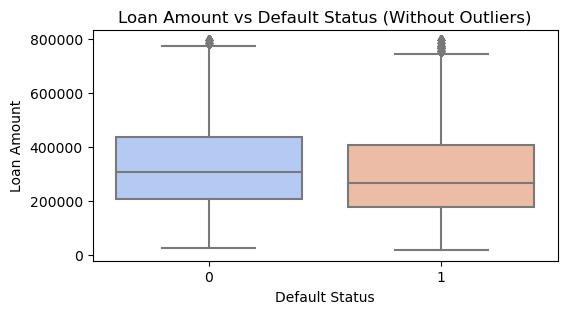

In [67]:
# Remove outliers from the 'loan_amount' column
df_cleaned_loan_amount = remove_outliers(df, 'loan_amount')

# Visualizing the relationship after removing outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='Status', y='loan_amount', data=df_cleaned_loan_amount, palette='coolwarm')
plt.title('Loan Amount vs Default Status (Without Outliers)')
plt.xlabel('Default Status')
plt.ylabel('Loan Amount')
plt.show()



1. **Similar Loan Amount Range for Both Groups**: Both defaulters (Status 1) and non-defaulters (Status 0) have similar median loan amounts, indicating that loan amounts are not significantly different between these two groups.

2. **Wider Spread for Non-Defaulters**: Non-defaulters show a wider spread of loan amounts, including higher values and more extreme outliers, suggesting some individuals take much larger loans.

3. **Higher Concentration of Lower Loan Amounts for Defaulters**: Defaulters tend to have a higher concentration of loans near the lower loan amount range, with fewer extreme outliers compared to non-defaulters.

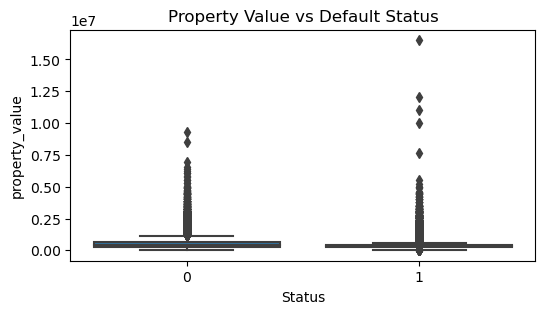

In [68]:
# Visualizing the relationship between Property Value and Default Status
plt.figure(figsize=(6,3))
sns.boxplot(x='Status', y='property_value', data=df)
plt.title('Property Value vs Default Status')
plt.show()

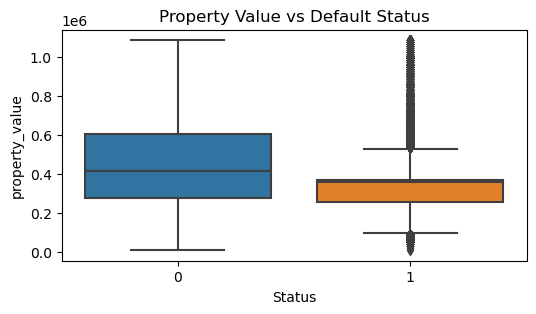

In [69]:
Q1 = df['property_value'].quantile(0.25)
Q3 = df['property_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
filtered_df = df[(df['property_value'] > lower_bound) & (df['property_value'] < upper_bound)]

plt.figure(figsize=(6,3))
sns.boxplot(x='Status', y='property_value', data=filtered_df)
plt.title('Property Value vs Default Status')
plt.show()

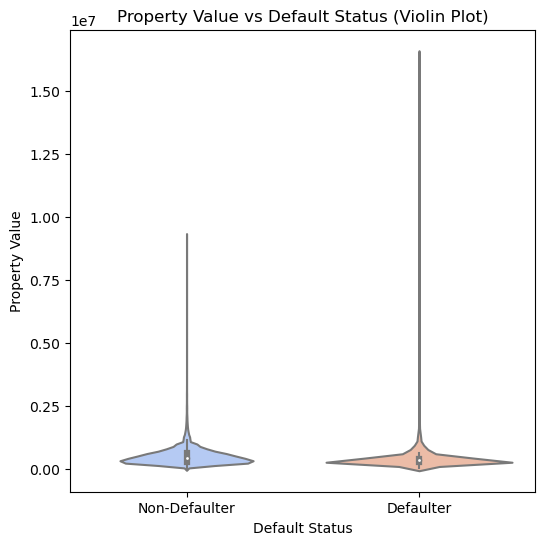

In [70]:
# Visualizing the relationship between Property Value and Default Status using a Violin Plot
plt.figure(figsize=(6, 6))
sns.violinplot(x='Status', y='property_value', data=df, palette='coolwarm')
plt.title('Property Value vs Default Status (Violin Plot)')
plt.xlabel('Default Status')
plt.ylabel('Property Value')
plt.xticks([0, 1], ['Non-Defaulter', 'Defaulter'])
plt.show()

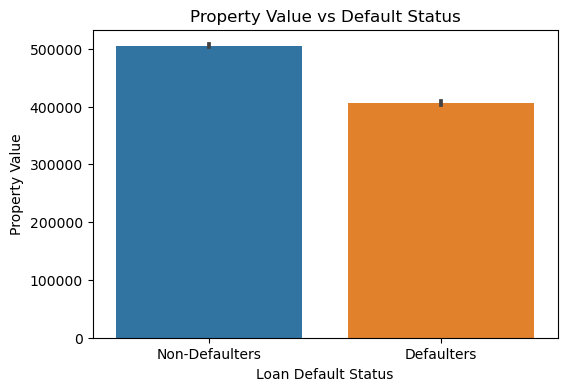

In [71]:
# Visualizing the relationship between Property Value and Default Status using a Strip Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Status', y='property_value', data=df)
plt.title('Property Value vs Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Property Value')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()


**1. Property Value and Default Status:**
The plot suggests a positive correlation between property value and default status.
Properties with higher values tend to have a higher proportion of defaults.

**2. Distribution of Property Values:**
The distribution of property values is skewed to the right for both default and non-default categories.
This indicates that there are more properties with lower values compared to higher values.

**3. Outliers and Variability:**
There are several outliers in the data, especially for properties with higher values and default status.
This suggests that there might be some exceptional cases where high-value properties defaulted, which could be due to various factors like economic conditions, loan terms, or individual circumstances.

In [72]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status,dti,collateral_present
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,3.99,0.0,...,1740.0,EXP,758,CIB,25-34,98.728814,south,1,66.954023,With Collateral
1,24891,2019,cf,Male,type2,p1,b/c,206500,3.99,0.0,...,4980.0,EQUI,552,EXP,55-64,86.512606,North,1,41.465863,With Collateral
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,...,9480.0,EXP,834,CIB,35-44,80.019685,south,0,42.879747,With Collateral
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,0.0,...,11880.0,EXP,587,CIB,45-54,69.376900,North,0,38.425926,With Collateral
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,0,66.714559,With Collateral


### Loan-to-Value (LTV) Ratio

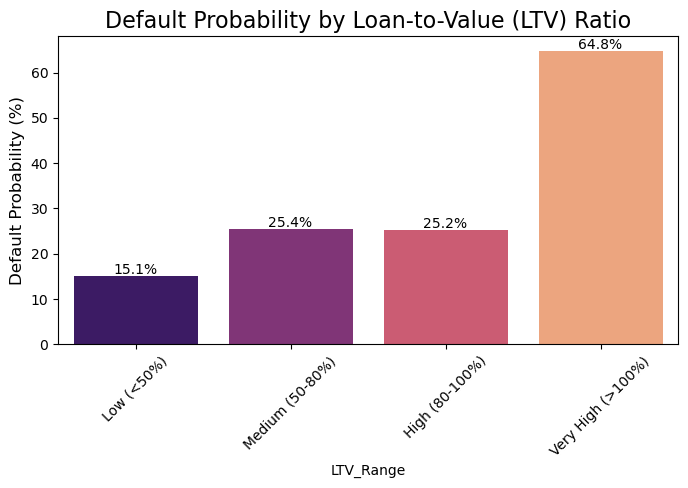

In [73]:
# Define 'collateral_present' column based on property_value to identify secured loans
df['collateral_present'] = df['property_value'].apply(lambda x: 'With Collateral' if x > 0 else 'No Collateral')

# Filter secured loans
secured_loans = df[df['collateral_present'] == 'With Collateral']

# Categorize LTV ratios
bins = [0, 50, 80, 100, 150]  
labels = ['Low (<50%)', 'Medium (50-80%)', 'High (80-100%)', 'Very High (>100%)']
secured_loans['LTV_Range'] = pd.cut(secured_loans['LTV'], bins=bins, labels=labels)

# Calculate default probability by LTV range
ltv_default_rates = secured_loans.groupby('LTV_Range')['Status'].mean() * 100

# Plot default rates by LTV range
# Create the bar plot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(data=ltv_default_rates.reset_index(), x='LTV_Range', y='Status', palette='magma')

# Annotate each bar with the percentage
for bar in bar_plot.patches:
    height = bar.get_height()  # Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        height + 0.5,                      # Y-coordinate (slightly above the bar)
        f'{height:.1f}%',                  # Text to display (format to 1 decimal place)
        ha='center', fontsize=10           # Center alignment and font size
    )

# Add title and labels
plt.title('Default Probability by Loan-to-Value (LTV) Ratio', fontsize=16)

plt.ylabel('Default Probability (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()



1. **High LTV and Default Probability:** Borrowers with a "Very High" Loan-to-Value (LTV) ratio (>100%) have the highest default probability at 64.8%, indicating a significant risk in over-leveraged loans.  

2. **Lower Risk in Low LTV:** Borrowers with a "Low" LTV ratio (<50%) exhibit the lowest default probability at 15.1%, highlighting the reduced risk for loans with smaller balances compared to property values.  

3. **Similar Risk in Medium and High LTV:** The "Medium" (50-80%) and "High" (80-100%) LTV ranges have similar default probabilities, around 25%, indicating moderate risk levels for these categories.

### Regional Economic Indicators

Default Rate by Region (%):
Region
North         22.511442
North-East    30.445344
central       27.538232
south         26.629280
Name: Status, dtype: float64


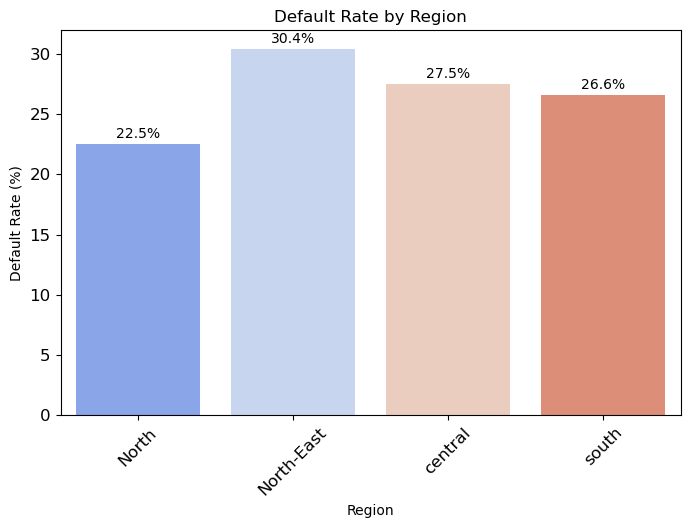

In [74]:
# Calculate default rate by region
regional_default_rates = df.groupby('Region')['Status'].mean() * 100
print("Default Rate by Region (%):")
print(regional_default_rates)

# Reset index for plotting
regional_default_rates = regional_default_rates.reset_index()

# Plot default rates by region
# Create the bar plot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=regional_default_rates, x='Region', y='Status', palette='coolwarm')

# Annotate each bar with the percentage
for bar in bar_plot.patches:
    height = bar.get_height()  # Get bar height
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        height + 0.5,                      # Y-coordinate (slightly above the bar)
        f'{height:.1f}%',                  # Text to display (format to 1 decimal place)
        ha='center', fontsize=10           # Center alignment and font size
    )

# Add title and labels
plt.title('Default Rate by Region')
plt.xlabel('Region')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


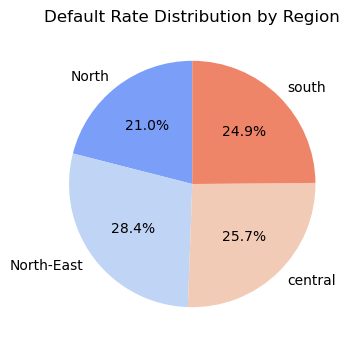

In [75]:
# Calculate proportions for the pie chart
regional_default_proportions = regional_default_rates.groupby('Region')['Status'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 4))
plt.pie(
    regional_default_proportions, 
    labels=regional_default_proportions.index, 
    autopct='%1.1f%%',  # Display percentages on the pie
    colors=sns.color_palette('coolwarm', len(regional_default_proportions)),
    startangle=90
)
plt.title('Default Rate Distribution by Region')
plt.show()


- **Highest Default Rate in North-East:** The North-East region has the highest default rate at around 30.4%, indicating a higher risk profile compared to other regions.

- **Regional Variation in Default Rates:** There is noticeable variation in default rates across regions, with the North showing the lowest rate (22.5%) and the other regions (Central and South) having rates close to 27-28%.

- **Potential Risk Factors by Region:** The differences in default rates may point to regional economic conditions or borrower characteristics that affect repayment abilities, with the North-East potentially requiring more attention for credit risk management.

### Borrower Age and Default Trends

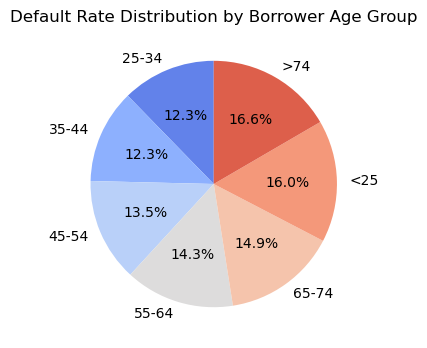

In [76]:
# Calculate default rate by age group (assuming 'age' is already in bins)
age_default_rates = df.groupby('age')['Status'].mean() * 100

# Reset index for plotting
age_default_rates = age_default_rates.reset_index()

# Calculate proportions for the pie chart
age_default_proportions = age_default_rates.groupby('age')['Status'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 4))
plt.pie(
    age_default_proportions, 
    labels=age_default_proportions.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('coolwarm', len(age_default_proportions)),
    startangle=90
)
plt.title('Default Rate Distribution by Borrower Age Group')
plt.show()



- **Higher Default Rates Among Youngest and Oldest Groups:** Borrowers under 25 and over 74 have the highest default rates, suggesting increased risk in these age groups.

- **Moderate Default Rates in Middle Age Groups:** Default rates for middle age groups (25-34, 35-44, 45-54, and 55-64) are relatively lower and more stable, indicating more reliable repayment behavior.

- **Potential Age-Related Risk Factors:** Younger borrowers may face income instability, while older borrowers may have fixed incomes or health-related expenses, which could contribute to higher default rates in these groups.

In [77]:
df[df.index==0].values

array([[24890, 2019, 'cf', 'Sex Not Available', 'type1', 'p1', 'nob/c',
        116500, 3.99, 0.0, 118000.0, 'pr', 1740.0, 'EXP', 758, 'CIB',
        '25-34', 98.72881356, 'south', 1, 66.95402298850574,
        'With Collateral']], dtype=object)

# Hypothesis & Testing

- `Ltv vs loan amount (Num vs Num)`

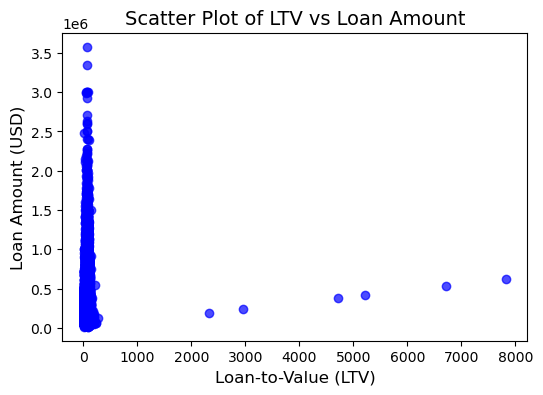

In [78]:
# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(x=df['LTV'], y=df['loan_amount'], alpha=0.7, color='blue')
plt.title('Scatter Plot of LTV vs Loan Amount', fontsize=14)
plt.xlabel('Loan-to-Value (LTV)', fontsize=12)
plt.ylabel('Loan Amount (USD)', fontsize=12)

plt.show()

- The correlation is statistically significant due to a large sample size, but the effect size (the strength of the relationship) is negligible.
- In other words, the relationship exists but is not practically meaningful.

### Null Hypothesis (\(Ho\)):
There is no linear correlation between the two features.  

Ho: Ho = 0

### Alternative Hypothesis (\(H1\)):
There is a linear correlation between the two features.  

H1: Ho != 0 

### Interpretation:
- If the **p-value** is less than the significance level (e.g., \(0.05\)):
  - **Reject \(Ho\)**: Conclude that there is a significant linear correlation between the two features.
- If the **p-value** is greater than or equal to \(0.05\):
  - **Fail to reject \(Ho\)**: Conclude that there is no significant linear correlation between the two features.

### Test

In [79]:
from scipy.stats import pearsonr

# Select the two features to test
feature1 = 'LTV'
feature2 = 'loan_amount'

# Perform the Pearson correlation test
corr, p_value = pearsonr(df[feature1], df[feature2])

# Display the results
print(f"Correlation Coefficient between {feature1} and {feature2}: {corr}")
print(f"P-value: {p_value}")

Correlation Coefficient between LTV and loan_amount: 0.0333971773722085
P-value: 5.782055546826296e-38


### Conclustion

In [80]:
# Interpret the result
if p_value < 0.05:
    print(f"The correlation between {feature1} and {feature2} is statistically significant.")
else:
    print(f"The correlation between {feature1} and {feature2} is not statistically significant.")

The correlation between LTV and loan_amount is statistically significant.


## Spearman correlation test
### Null Hypothesis (\(Ho\)):
There is no linear correlation between the two features.  

Ho: Ho = 0

### Alternative Hypothesis (\(H1\)):
There is a linear correlation between the two features.  

H1: Ho != 0 


### Test

In [81]:
from scipy.stats import spearmanr

# Select the two features to test
feature1 = 'LTV'
feature2 = 'loan_amount'

# Perform the Spearman correlation test
corr, p_value = spearmanr(df[feature1], df[feature2])

# Display the results
print(f"Spearman Correlation Coefficient between {feature1} and {feature2}: {corr}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient between LTV and loan_amount: 0.07061623644808815
P-value: 1.2030274983216297e-163


### Interpretation

In [82]:
# Interpretation
if p_value < 0.05:
    print(f"The correlation between {feature1} and {feature2} is statistically significant.")
else:
    print(f"The correlation between {feature1} and {feature2} is not statistically significant.")

The correlation between LTV and loan_amount is statistically significant.


- While the correlation is significant, it doesn’t imply that one variable causes the other to change—it only indicates an association.

# Categorical variable

- `Loan_type vs Status (Cat vs Cat)`

In [83]:
df['loan_type'].value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

In [84]:
# Filter the DataFrame where Status is 1 (defaulter)
filtered_df = df[df['Status'] == 1]

# Count the values of loan_type for Status == 1
filtered_df['loan_type'].value_counts()

type1    25775
type2     7172
type3     3692
Name: loan_type, dtype: int64

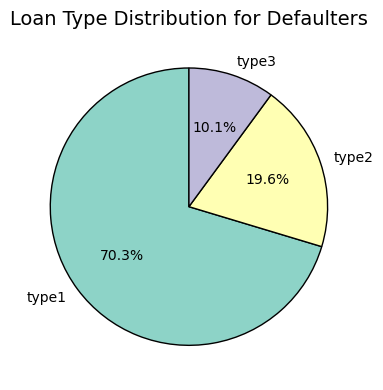

In [85]:
import matplotlib.pyplot as plt

# Filter the DataFrame where Status is 1 (defaulter)
filtered_df = df[df['Status'] == 1]

# Count the values of loan_type for defaulters
loan_type_counts = filtered_df['loan_type'].value_counts()

# Create a pie chart with bright colors
plt.figure(figsize=(6, 4))
plt.pie(
    loan_type_counts.values,  # Values for the pie chart
    labels=loan_type_counts.index,  # Labels for each segment
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start angle for the pie chart
    colors=plt.cm.Set3.colors,  # Use a bright colormap for colors
    wedgeprops={'edgecolor': 'black'}  # Add a border to wedges
)

# Add a title
plt.title("Loan Type Distribution for Defaulters", fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()


- Here we can see that, the maximum default is for loan type1 and type three is so small compared to type 2,3.
- Let's cross chek with hypothesis

### Chu square test

### Null Hypothesis (Ho):
There is no linear correlation between the two features.  

Ho: Ho = 0

### Alternative Hypothesis (H1):
There is a linear correlation between the two features.  

H1: Ho != 0 

In [86]:
from scipy.stats import chi2_contingency

# Select the two categorical features to test
feature1 = 'loan_type'
feature2 = 'Status'  # Example: Defaulter or Normal

# Create a contingency table
contingency_table = pd.crosstab(df[feature1], df[feature2])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Test Results between {feature1} and {feature2}:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Test Results between loan_type and Status:
Chi-Square Statistic: 1309.9581425319489
P-value: 3.5172528245408e-285
Degrees of Freedom: 2
Expected Frequencies: 
[[85282.06338199 27890.93661801]
 [15645.30585861  5116.69414139]
 [11103.6307594   3631.3692406 ]]


### Interpretation

In [87]:
if p_value < 0.05:
    print(f"The relationship between {feature1} and {feature2} is statistically significant.")
else:
    print(f"The relationship between {feature1} and {feature2} is not statistically significant.")

The relationship between loan_type and Status is statistically significant.


### Chi square test
- `loan_purpose vs Status (Cat vs Cat)`

In [88]:
# Filter the DataFrame where Status is 1 (defaulter)
filtered_df = df[df['Status'] == 1]

# Count the values of loan_purpose for Status == 1
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()

# Display the result
print(loan_purpose_counts)

p3    14031
p4    12590
p1     8935
p2     1083
Name: loan_purpose, dtype: int64


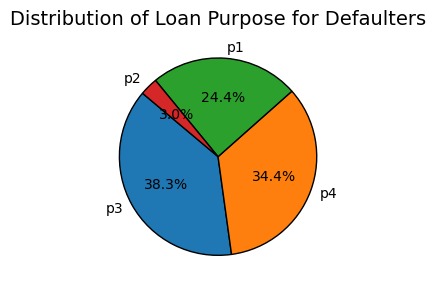

In [89]:
import matplotlib.pyplot as plt

# Assuming `loan_purpose_counts` is already calculated
# Example: filtered_df['loan_purpose'].value_counts()
loan_purpose_counts = filtered_df['loan_purpose'].value_counts()

# Extract data for the pie chart
labels = loan_purpose_counts.index
sizes = loan_purpose_counts.values

# Create the pie chart
plt.figure(figsize=(6,3))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Chart details
plt.title("Distribution of Loan Purpose for Defaulters", fontsize=14)

# Show the chart
plt.tight_layout()
plt.show()

- The majority of defaulters have loan purposes categorized as "p3" and "p4," with "p3" being the most common (14,031 instances). In contrast, "p2" has significantly fewer instances, indicating it is the least common loan purpose among defaulters.

### Null Hypothesis (Ho):
There is no linear correlation between the two features.  

Ho: Ho = 0

### Alternative Hypothesis (H1):
There is a linear correlation between the two features.  

H1: Ho != 0 

### Test

In [90]:
from scipy.stats import chi2_contingency

# Create a contingency table for loan_purpose and Status
contingency_table = pd.crosstab(df['loan_purpose'], df['Status'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 240.27555900080722
P-value: 8.296912096696388e-52
Degrees of Freedom: 3
Expected Frequencies: 
[[26019.49552028  8509.50447972]
 [ 2467.13858882   806.86141118]
 [42250.3134997  13817.6865003 ]
 [41294.0523912  13504.9476088 ]]


### Interpretation

In [91]:
if p_value < 0.05:
    print("There is a significant relationship between loan_purpose and Status (defaulters).")
else:
    print("There is no significant relationship between loan_purpose and Status (defaulters).")

There is a significant relationship between loan_purpose and Status (defaulters).


- `business_or_commercial vs Status`

In [92]:
# Filter the DataFrame where Status is 1 (defaulter)
filtered_df = df[df['Status'] == 1]

# Count the values of business_or_commercial for Status == 1
business_or_commercial_counts = filtered_df['business_or_commercial'].value_counts()


print("\nBusiness or Commercial Counts for Status == 1:")
print(business_or_commercial_counts)


Business or Commercial Counts for Status == 1:
nob/c    29467
b/c       7172
Name: business_or_commercial, dtype: int64


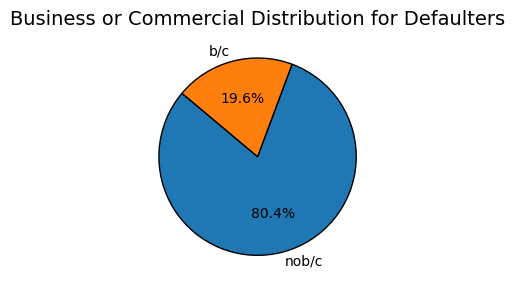

In [93]:
business_or_commercial_counts = filtered_df['business_or_commercial'].value_counts()

# Extract data for the pie chart
labels = business_or_commercial_counts.index
sizes = business_or_commercial_counts.values

# Create the pie chart
plt.figure(figsize=(6,3))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Chart details
plt.title("Business or Commercial Distribution for Defaulters", fontsize=14)

# Show the chart
plt.tight_layout()
plt.show()

1. **More Defaults in Non-Business Loans**: Most defaults are from **non-business loans (nob/c)**, indicating higher risk in this category.
  
2. **Risk Factors**: This suggests personal loans may have greater risk, warranting further investigation.

### T-test independent
- `Credit_score vs Status (Num vs Cat)`

### Null Hypothesis (Ho):
- Ho: There is no significant difference in the Credit Scores between defaulters (Status = 1) and non-defaulters (Status = 0).
This means that the average Credit Scores of both groups are the same.

### Alternative Hypothesis (H1):
- H1: There is a significant difference in the Credit Scores between defaulters and non-defaulters.
This means that the average Credit Scores of the two groups are not the same.

### Test

In [94]:
from scipy.stats import ttest_ind

# Split the data into defaulters (Status == 1) and non-defaulters (Status == 0)
defaulters = df[df['Status'] == 1]['Credit_Score']
non_defaulters = df[df['Status'] == 0]['Credit_Score']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(defaulters, non_defaulters)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.5437361122829274
P-value: 0.12265440254169067


### Interpretation

In [95]:
if p_value < 0.05:
    print("There is a significant difference in Credit Scores between defaulters and non-defaulters.")
else:
    print("There is no significant difference in Credit Scores between defaulters and non-defaulters.")

There is no significant difference in Credit Scores between defaulters and non-defaulters.


- `So, we can conclude that loan status is independent of credict score`

#### Investigating the correlation between upfront charges, loan amount, interest rates, and property values with the likelihood of default. analyze patterns and uncover insights into default tendencies.

In [97]:
from scipy.stats import pearsonr, spearmanr

# Define the list of continuous variables to analyze
features = ['Upfront_charges', 'loan_amount', 'rate_of_interest', 'property_value']

# Loop through the features and calculate Pearson and Spearman correlations with Status
for feature in features:
    # Calculate Pearson correlation and its p-value
    pearson_corr, pearson_p_value = pearsonr(df[feature], df['Status'])
    
    # Calculate Spearman correlation and its p-value
    spearman_corr, spearman_p_value = spearmanr(df[feature], df['Status'])
    
    # Print the results for the current feature
    print(f"Feature: {feature}")
    print(f"Pearson Correlation: {pearson_corr}, P-value: {pearson_p_value}")
    
    # Interpretation for Pearson
    if pearson_p_value < 0.05:
        print(f"There is a significant correlation between this {feature} and default status (Pearson).")
    else:
        print(f"There is no significant correlation between this {feature} and default status (Pearson).")
    
    print(f"Spearman Correlation: {spearman_corr}, P-value: {spearman_p_value}")
    
    # Interpretation for Spearman
    if spearman_p_value < 0.05:
        print(f"There is a significant correlation between this {feature} and default status (Spearman).")
    else:
        print(f"There is no significant correlation between this {feature} and default status (Spearman).")
    
    print("-" * 50)


Feature: Upfront_charges
Pearson Correlation: -0.43118271941414044, P-value: 0.0
There is a significant correlation between this Upfront_charges and default status (Pearson).
Spearman Correlation: -0.6066121118448848, P-value: 0.0
There is a significant correlation between this Upfront_charges and default status (Spearman).
--------------------------------------------------
Feature: loan_amount
Pearson Correlation: -0.03682527554437436, P-value: 8.690627679284129e-46
There is a significant correlation between this loan_amount and default status (Pearson).
Spearman Correlation: -0.06884161419818988, P-value: 1.3178355318827435e-155
There is a significant correlation between this loan_amount and default status (Spearman).
--------------------------------------------------
Feature: rate_of_interest
Pearson Correlation: -0.1091198558431342, P-value: 0.0
There is a significant correlation between this rate_of_interest and default status (Pearson).
Spearman Correlation: -0.07319176533612838,

# Recommendations

Based on the above analysis, here are the recommendations aligned with the risk management objectives:

### 1. **Loan Characteristics and Default Risk**
   - **Loan Type**: 
     - Type 2 loans exhibit the highest default rate (34.5%). Stricter eligibility requirements for these loans could mitigate risks.
   - **Loan Purpose**:
     - Loans categorized as "p3" and "p4" have the highest default rates. Lending institutions should consider a detailed risk assessment for these purposes.
   - **Loan Amount**:
     - Lower loan amounts correlate with higher default risks. Implementing a minimum threshold for loan amounts or enhanced scrutiny for small loans could reduce defaults.

### 2. **Borrower Characteristics**
   - **Age**:
     - Borrowers under 25 and over 74 show the highest default rates. Offering financial education programs for young borrowers and tailored repayment plans for older individuals could reduce risks.
   - **Credit Score**:
     - Credit scores alone do not strongly differentiate between defaulters and non-defaulters. A combined risk score with additional factors may improve predictive accuracy.

### 3. **Economic and Collateral Factors**
   - **LTV Ratio**:
     - Higher LTV ratios significantly increase default risks. Implementing stricter LTV caps, especially for "High" (80–100%) and "Very High" (>100%) categories, is recommended.
   - **Collateral**:
     - Non-collateral loans exhibit a higher default rate. Encouraging secured loans or incentivizing borrowers to provide collateral could help mitigate risk.

### 4. **Loan Pricing and Terms**
   - **Interest Rates**:
     - Higher interest rates (>4%) are associated with increased default risks. Consider offering competitive rates to attract lower-risk borrowers.
   - **Upfront Charges**:
     - There is a strong negative correlation between upfront charges and default likelihood. Higher upfront charges may act as a deterrent to risky borrowers.

### 5. **Regional Strategies**
   - **Regional Variation**:
     - The North-East region exhibits the highest default rate (30.4%). Tailored financial products and risk assessment measures are needed for this region.

### 6. **Monitoring and Reporting**
   - Implement regular monitoring of Debt-to-Income (DTI) ratios, as higher ratios are linked to defaults.
   - Analyze combinations of borrower, loan, and economic factors for a multidimensional risk assessment approach.

### Recommendations for Each Column

---

#### **1. Loan Limit**
   - **Observation**: Borrowers with “ncf” (non-conforming) loans have a default rate of 33.21%, compared to 24.03% for “cf” (conforming) loans.  
   - **Recommendation**:  
     - Limit the issuance of "ncf" loans or apply stricter underwriting standards for these high-risk loans.
     - Introduce additional eligibility checks for non-conforming loan applicants.

---

#### **2. Loan Type**
   - **Observation**: Type 2 loans show the highest default rate (34.54%), followed by Type 3 (25.06%) and Type 1 (22.77%).  
   - **Recommendation**:  
     - Conduct enhanced risk assessments for Type 2 loans and consider increasing minimum eligibility criteria.
     - Prioritize offering Type 1 loans, which have the lowest default risk, to maintain a safer portfolio.  

---

#### **3. Loan Purpose**
   - **Observation**: Loans with purposes categorized as “p3” and “p4” have the highest defaults.  
   - **Recommendation**:  
     - Introduce stricter screening for borrowers applying under "p3" and "p4."
     - Provide specialized financial counseling for higher-risk purposes to reduce default tendencies.

---

#### **4. Business or Commercial Nature**
   - **Observation**: Non-business loans ("nob/c") have a higher default rate compared to business loans.  
   - **Recommendation**:  
     - Focus on promoting secured business loans and enhancing monitoring of non-business loans.
     - Offer lower interest rates or flexible repayment plans for business loans to attract safer borrowers.

---

#### **5. Loan Amount**
   - **Observation**: Smaller loan amounts are associated with higher default rates.  
   - **Recommendation**:  
     - Set a minimum loan amount threshold to avoid issuing loans with higher risks of default.
     - Perform more comprehensive risk evaluations for small loans to ensure creditworthiness.

---

#### **6. Rate of Interest**
   - **Observation**: Interest rates above 4% are linked to higher default rates.  
   - **Recommendation**:  
     - Consider offering competitive interest rates to borrowers with strong financial profiles.
     - Use interest rate thresholds to segregate and monitor high-risk borrowers proactively.

---

#### **7. Upfront Charges**
   - **Observation**: Higher upfront charges are associated with lower default rates.  
   - **Recommendation**:  
     - Increase upfront charges slightly for high-risk borrowers to mitigate default risks.
     - Offer upfront charge discounts for safer borrower profiles to enhance customer loyalty.

---

#### **8. Property Value**
   - **Observation**: Borrowers with higher property values are less likely to default.  
   - **Recommendation**:  
     - Incentivize secured loans backed by high-value properties to reduce risks.
     - Tighten criteria for loans issued without property collateral.

---

#### **9. Loan-to-Value (LTV) Ratio**
   - **Observation**: Borrowers with LTV ratios >100% have the highest default rates (64.8%), while those with <50% have the lowest (15.1%).  
   - **Recommendation**:  
     - Introduce strict caps for LTV ratios, especially for high-risk categories above 80%.  
     - Promote loans with lower LTV ratios by offering better terms for borrowers with more equity.

---

#### **10. Debt-to-Income (DTI) Ratio**
   - **Observation**: Higher DTI ratios are correlated with defaults, especially in extreme cases.  
   - **Recommendation**:  
     - Set an upper limit for acceptable DTI ratios to ensure borrowers have manageable debt loads.
     - Implement regular monitoring of borrower DTIs during the loan tenure for early risk detection.

---

#### **11. Credit Score**
   - **Observation**: Credit score alone does not strongly predict defaults.  
   - **Recommendation**:  
     - Combine credit score with other indicators (e.g., income, loan purpose) to create a comprehensive risk profile.
     - Target financial education initiatives at lower-credit-score borrowers to improve repayment behavior.

---

#### **12. Region**
   - **Observation**: The North-East region has the highest default rate (30.4%).  
   - **Recommendation**:  
     - Design region-specific risk mitigation strategies, such as additional borrower support in high-risk areas.
     - Partner with local financial advisors to better understand regional repayment behaviors.

---

#### **13. Age**
   - **Observation**: Borrowers under 25 and over 74 show the highest default rates.  
   - **Recommendation**:  
     - Offer financial literacy programs tailored for younger borrowers.
     - Provide flexible repayment plans or reduced EMI options for older borrowers to alleviate financial pressure.

---

#### **14. Gender**
   - **Observation**: Joint accounts have the lowest default rate (19.16%), while "Sex Not Available" has the highest (28.59%).  
   - **Recommendation**:  
     - Encourage joint account loans, which exhibit better repayment reliability.
     - Monitor loans for "Sex Not Available" profiles closely, as this category indicates higher risk.

---

#### **15. Collateral**
   - **Observation**: Loans without collateral have higher default rates.  
   - **Recommendation**:  
     - Promote secured loans by offering better interest rates and terms for loans backed by collateral.
     - Implement stricter approval criteria for unsecured loans.

---

#### **16. Occupancy Type**
   - **Observation**: Individual residence (ir) loans show the highest default rates (29.99%), while primary residence (pr) loans exhibit the lowest (24.3%).  
   - **Recommendation**:  
     - Focus lending on primary residences to minimize risks.
     - Introduce targeted risk assessment measures for individual residence loans.